In [1]:
from sklearn.model_selection import train_test_split
from joblib import parallel_backend
from ray.util.joblib import register_ray
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from skmultilearn.problem_transform import BinaryRelevance,ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import LancasterStemmer
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.adapt import BRkNNaClassifier,BRkNNbClassifier
from sklearn.multioutput import RegressorChain
from mlxtend.classifier import StackingClassifier
import joblib
from scipy.sparse import hstack
import ipyparallel as ipp
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('final_data.csv')
data

comments  rating             NN           JJ  \
0                   terrific purchase       5       purchase     terrific   
1                  highly recommended       5            NaN  recommended   
2                                 wow       5            wow          NaN   
3                   worth every penny       5          penny        worth   
4                            must buy       5            NaN          NaN   
...                               ...     ...            ...          ...   
124979             selfie camera poor       1  selfie camera         poor   
124980                   review month       1   review month          NaN   
124981  charger usb cable not working       1  charger cable          NaN   
124982           disoppointed quality       1        quality          NaN   
124983                 bad experience       1     experience          bad   

            RB            VB    MD  Other                         text  
0          NaN           NaN   NaN    NaN         purchase terrific     
1       highly           NaN   NaN    NaN         recommended highly    
2          NaN           NaN   NaN    NaN                      wow      
3          NaN           NaN   NaN  every               penny worth     
4          NaN           buy  must    NaN                     buy must  
...        ...           ...   ...    ...                          ...  
124979     NaN           NaN   NaN    NaN        selfie camera poor     
124980     NaN           NaN   NaN    NaN             review month      
124981     not       working   NaN    usb  charger cable  not working   
124982     NaN  disoppointed   NaN    NaN      quality   disoppointed   
124983     NaN           NaN   NaN    NaN            experience bad     

[124984 rows x 9 columns]

In [3]:
x=data['text']
y=data[['rating']]

In [4]:
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [5]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [6]:
train_features = hstack([train_char_features,train_word_features])

In [7]:
iter_model=[]
model_scores=[]
x_train,x_test,y_train,y_test=train_test_split(train_features,y,random_state = 42,test_size=0.20)

In [8]:
models=[RandomForestClassifier(),SVC(),ExtraTreesClassifier()]

In [9]:
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print('Acc score',accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*'*10)
    model_scores.append(accuracy_score(y_test,y_pred))
    iter_model.append(str(i))

RandomForestClassifier()
Acc score 0.7125255030603672
[[4059  492  291   57   51]
 [ 653 3655  493  104   69]
 [ 326  441 3150  930  157]
 [ 133  172  755 3412  605]
 [  95   70  307  985 3535]]
**********
SVC()
Acc score 0.713525623074769
[[4091  485  289   55   30]
 [ 669 3647  497   98   63]
 [ 300  458 3181  906  159]
 [ 131  151  816 3378  601]
 [  79   69  324  981 3539]]
**********
ExtraTreesClassifier()
Acc score 0.7131655798695844
[[4133  429  278   59   51]
 [ 723 3622  454  110   65]
 [ 395  401 3145  903  160]
 [ 157  145  766 3405  604]
 [  98   69  308  995 3522]]
**********


In [10]:
d={'Model':iter_model,'Accuracy Scores':model_scores}
models=pd.DataFrame(data=d)
models

Model  Accuracy Scores
0  RandomForestClassifier()         0.712526
1                     SVC()         0.713526
2    ExtraTreesClassifier()         0.713166

In [11]:
models.sort_values(by=['Accuracy Scores'],ascending=False)

Model  Accuracy Scores
1                     SVC()         0.713526
2    ExtraTreesClassifier()         0.713166
0  RandomForestClassifier()         0.712526

In [14]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[2,8,16,32,50],'class_weight':['balanced', 'balanced_subsample']}
clf = RandomizedSearchCV(ExtraTreesClassifier(), parameters, cv=3,scoring="accuracy",n_jobs=-1, verbose=1)
clf.fit(train_features,y)
clf.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample'}

In [15]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(43,100,2):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20)
        model.fit(x_train,y_train)
        tmp=accuracy_score(y_test,model.predict(x_test))
        print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum accuracy_score is at random state :",random," and it is :",score)

In [16]:
besttrain(ExtraTreesClassifier(max_features='sqrt',criterion='entropy',max_depth=50,class_weight='balanced_subsample'),train_features,y)

43 0.702004240508861
45 0.700844101292155
47 0.6994439332719926
49 0.7059647157658919
51 0.7055646677601313
53 0.7047645717486098
55 0.6972436692403088
57 0.7041244949393928
59 0.7070048405808697
61 0.7017642117054046
63 0.7050846101532184
65 0.7035244229307517
67 0.704844581349762
69 0.7036044325319039
71 0.7030043605232628
73 0.7017242069048286
75 0.6994439332719926
77 0.700844101292155
79 0.7000040004800576
81 0.7024842981157738
83 0.7067248069768373
85 0.7010841300956114
87 0.7103252390286835
89 0.7065247829739568
91 0.7012041444973397
93 0.7036844421330559
95 0.706004720566468
97 0.6998839860783294
99 0.698483818058167
maximum accuracy_score is at random state : 87  and it is : 0.7103252390286835


In [17]:
x_train,x_test,y_train,y_test=train_test_split(train_features,y,random_state = 87 ,test_size=0.20)
model = ExtraTreesClassifier(max_features='sqrt',criterion='entropy',max_depth=50,class_weight='balanced_subsample')
model.fit(x_train,y_train)
y_acc=model.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=model.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(model,x_train,y_train,cv=5,verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

Train accuracy 0.8010441357376459
Test accuracy 0.7081649797975758
classification report 
               precision    recall  f1-score   support

           1       0.80      0.81      0.80      5050
           2       0.83      0.70      0.76      4959
           3       0.55      0.69      0.61      5005
           4       0.66      0.64      0.65      5128
           5       0.78      0.71      0.75      4855

    accuracy                           0.71     24997
   macro avg       0.72      0.71      0.71     24997
weighted avg       0.72      0.71      0.71     24997



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 32.1min remaining: 48.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 32.7min finished


cross_val_score: 0.696700540684663
accuracy bigger
diff 0.011464439112912728
std: 0.002322718155297735


In [18]:
y_acc=model.predict(train_features)
print('Overall accuracy',accuracy_score(y,y_acc))
print("classification report \n",classification_report(y,y_acc))
scores=cross_val_score(model,train_features,y,cv=5,verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
std=np.std(scores)
print('std:',std)

Overall accuracy 0.7824681559239582
classification report 
               precision    recall  f1-score   support

           1       0.88      0.87      0.88     24997
           2       0.89      0.78      0.83     24999
           3       0.63      0.77      0.69     24993
           4       0.70      0.72      0.71     24997
           5       0.87      0.78      0.82     24998

    accuracy                           0.78    124984
   macro avg       0.79      0.78      0.79    124984
weighted avg       0.79      0.78      0.79    124984



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 42.9min remaining: 64.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 46.3min finished


cross_val_score: 0.6604904225568999
std: 0.23705118117181018


In [19]:
data['Rate_Pred']=y_acc

In [34]:
data=data.fillna('')

In [35]:
data_1=data[data['Rate_Pred']==1]
data_2=data[data['Rate_Pred']==2]
data_3=data[data['Rate_Pred']==3]
data_4=data[data['Rate_Pred']==4]
data_5=data[data['Rate_Pred']==5]

In [36]:
listy=['NN','JJ','RB','VB','MD','Other']
dicty={5:'green',4:'blue',3:'yellow',2:'orange',1:'red'}
dat=[data_1,data_2,data_3,data_4,data_5]

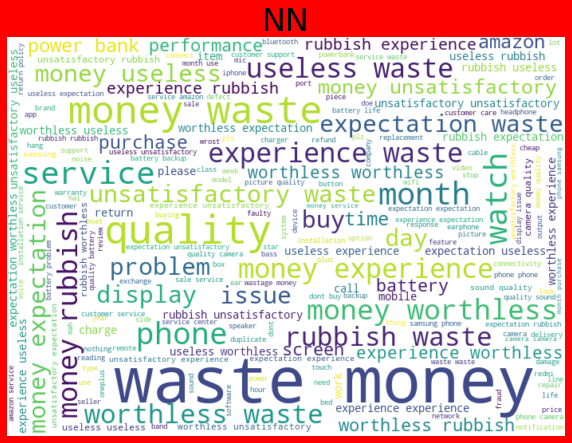

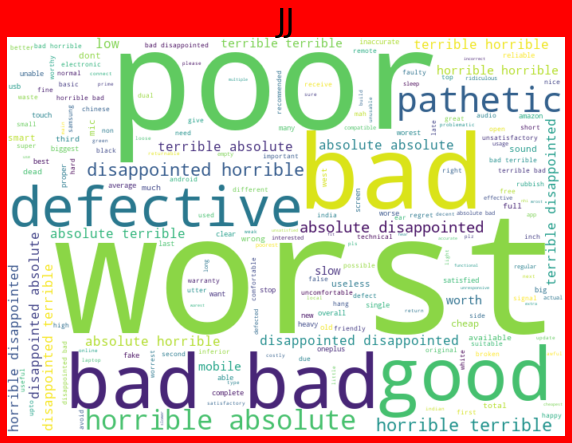

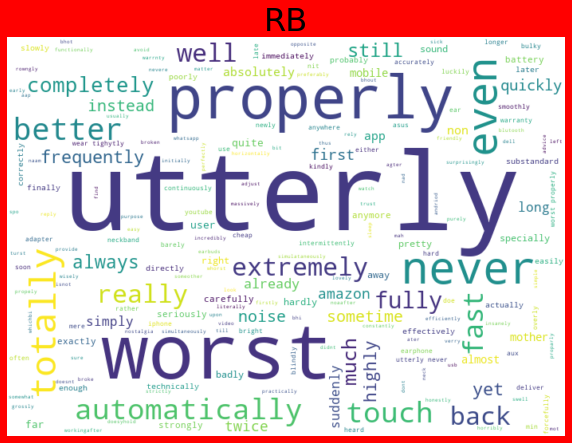

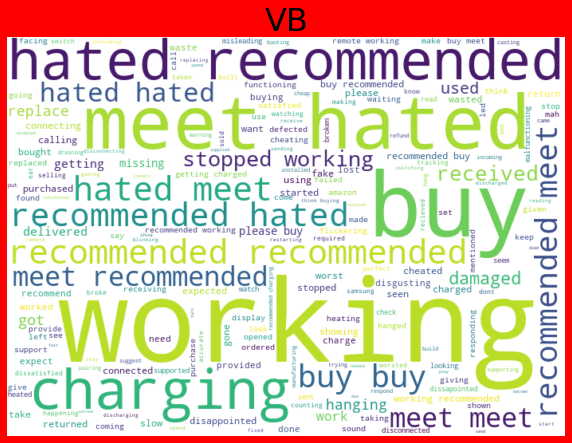

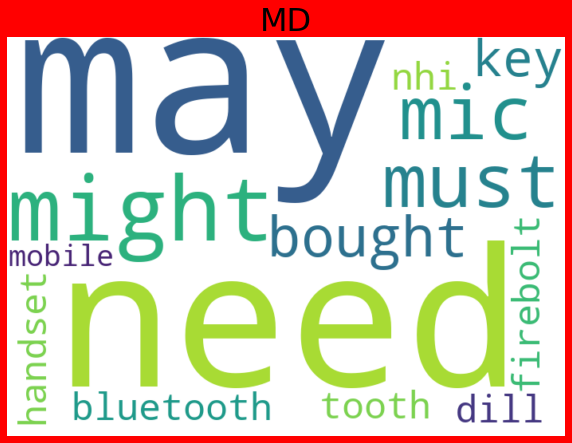

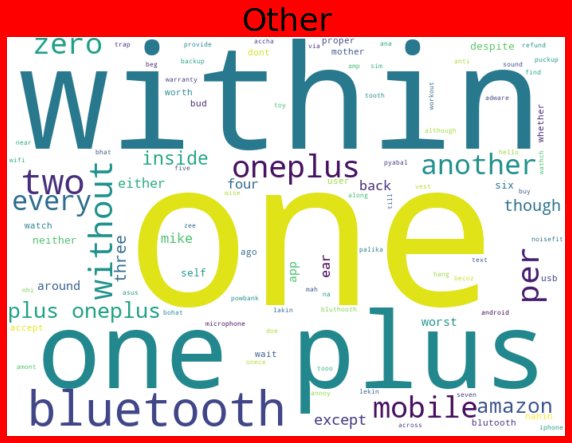

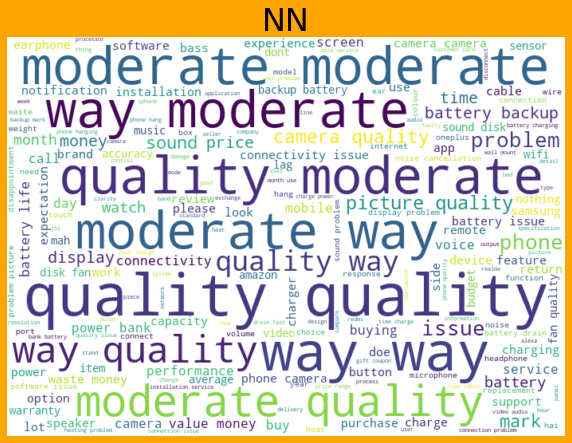

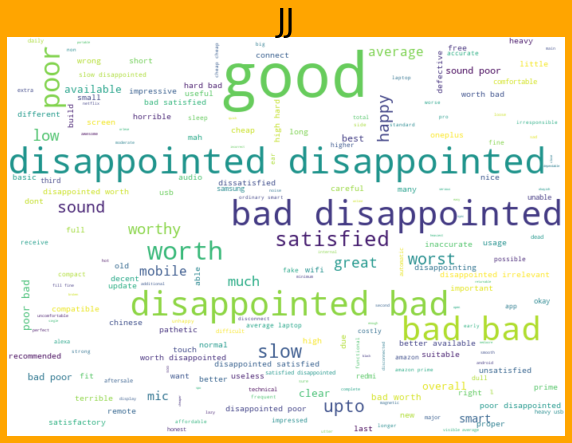

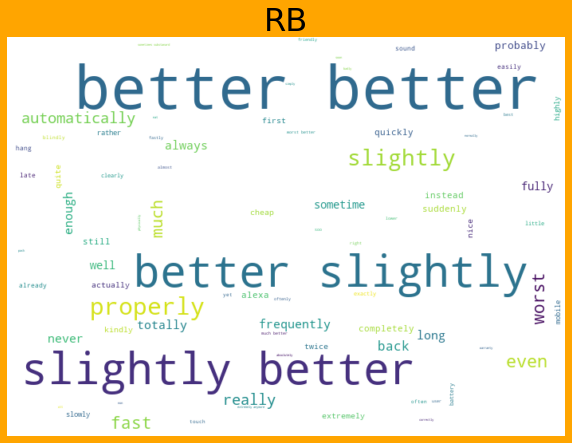

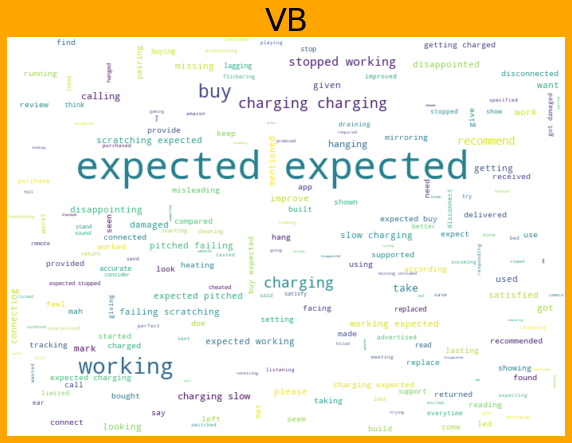

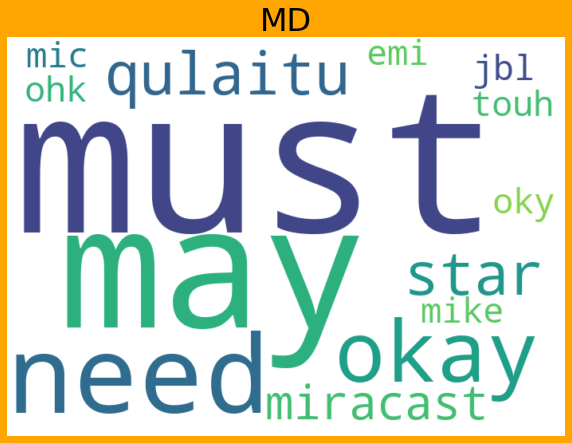

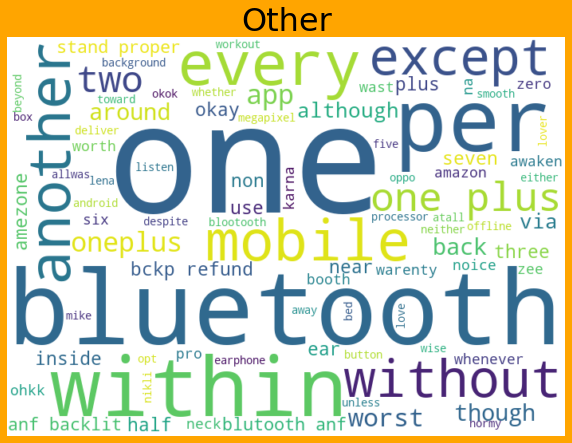

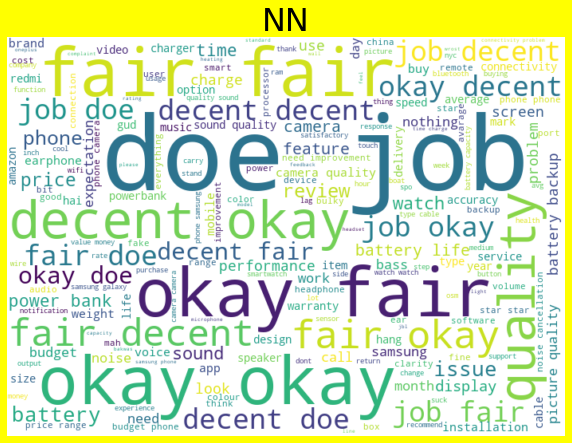

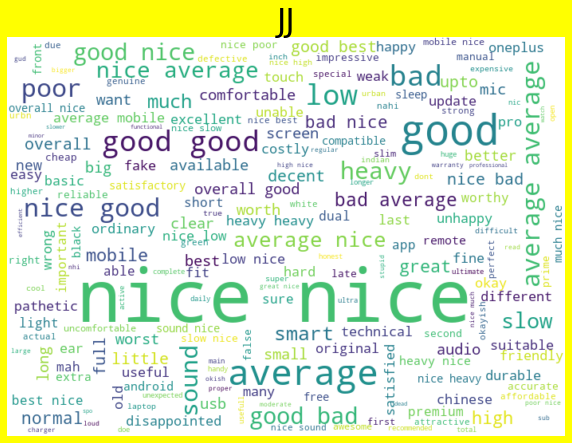

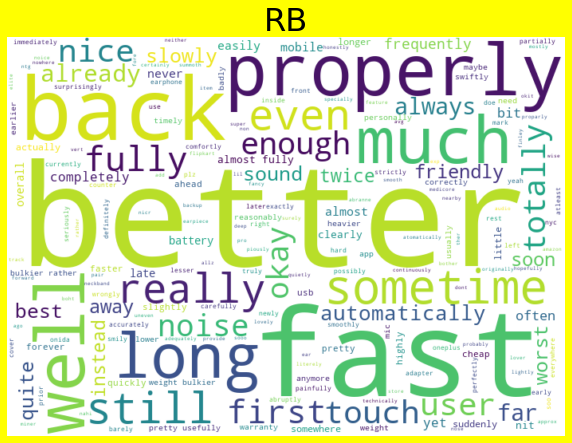

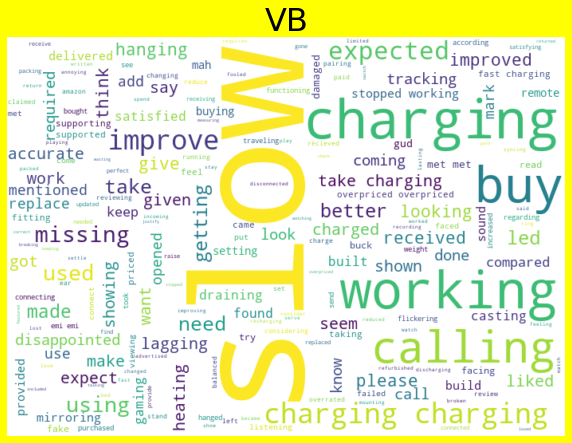

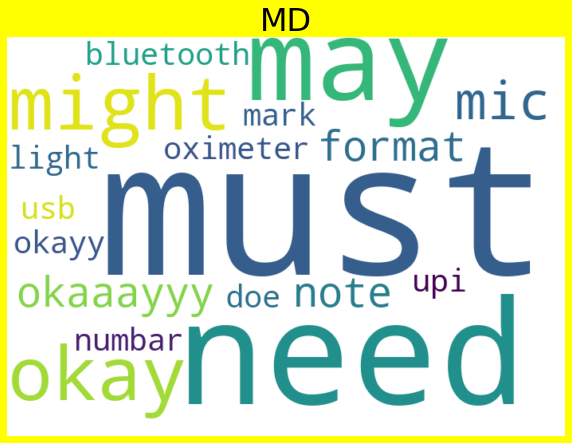

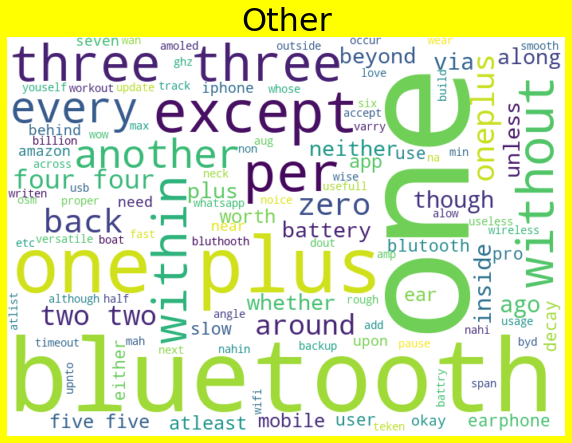

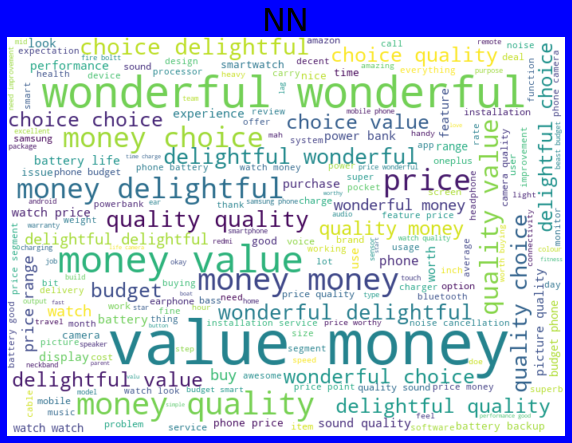

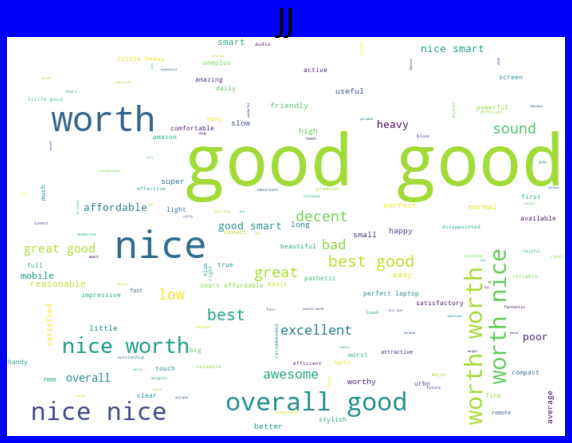

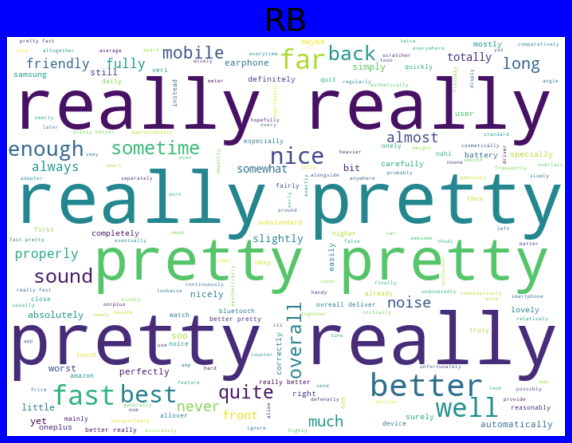

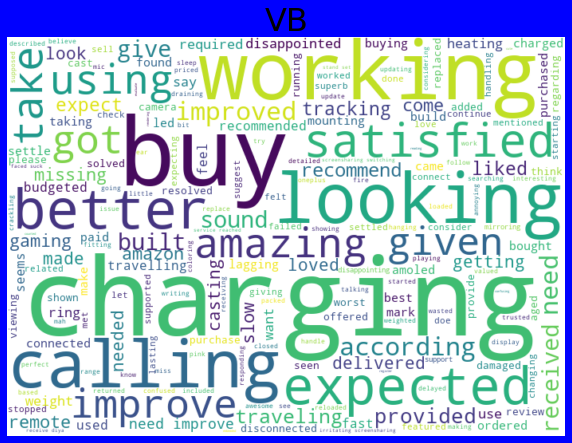

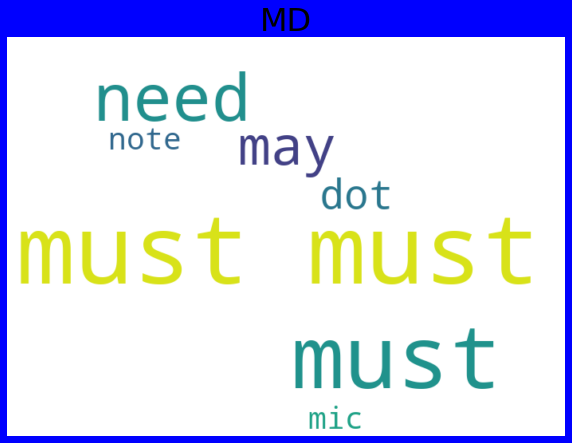

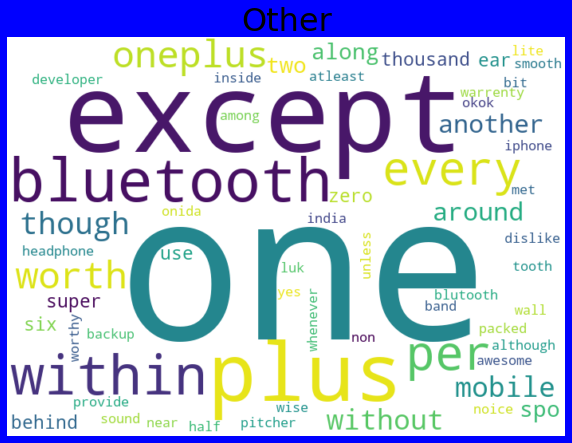

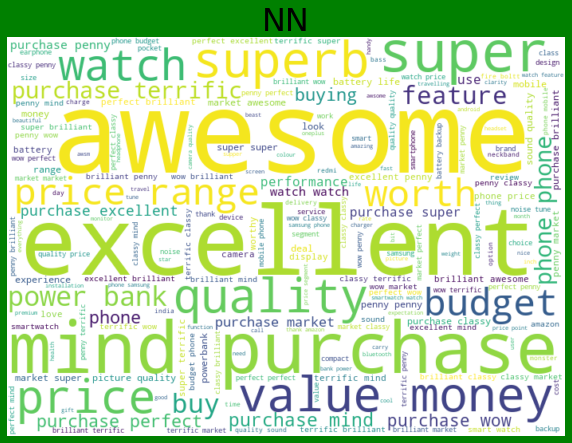

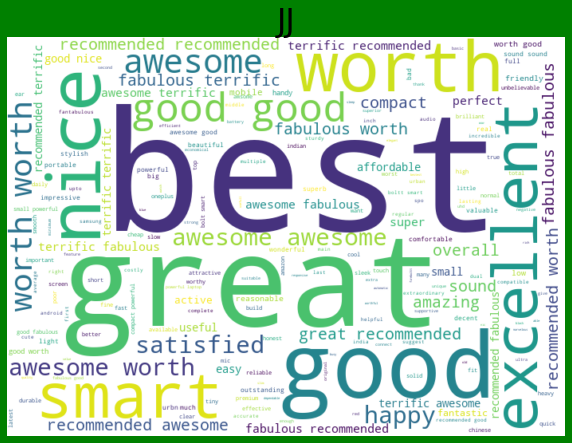

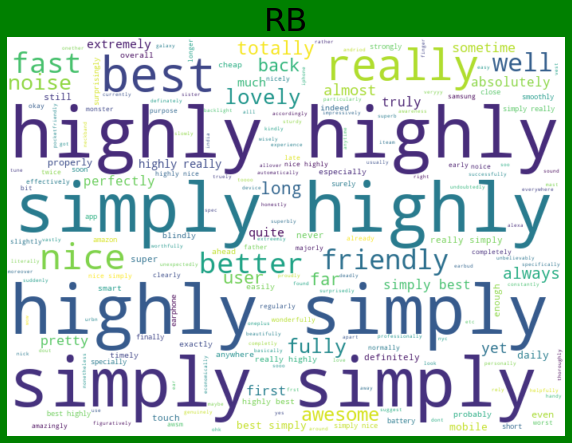

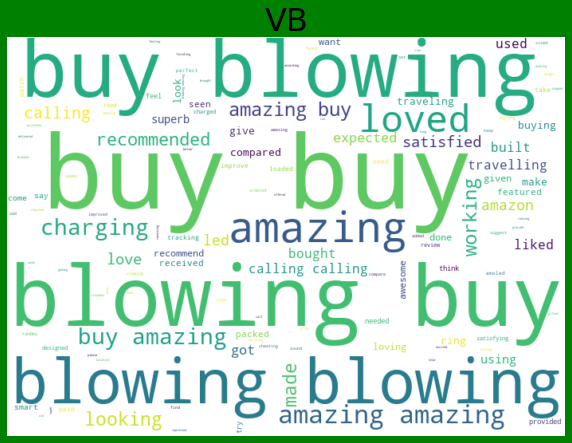

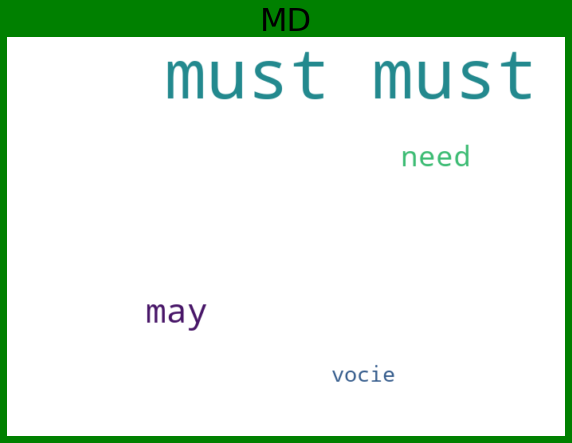

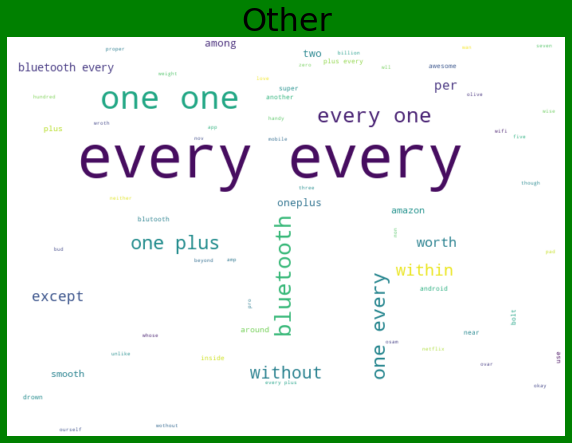

In [37]:
for j in range(len(dat)):
    for i in listy:
        plt.figure(figsize = (10,8),facecolor=dicty[j+1])
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat[j][i]))
        plt.imshow(wordC, interpolation='bilinear')
        plt.title(i, fontsize = 32)
        plt.axis("off")
        plt.show()

In [31]:
data['Diff Rate']=data['Rate_Pred']-data['rating']
data

comments  rating             NN           JJ  \
0                   terrific purchase       5       purchase     terrific   
1                  highly recommended       5            NaN  recommended   
2                                 wow       5            wow          NaN   
3                   worth every penny       5          penny        worth   
4                            must buy       5            NaN          NaN   
...                               ...     ...            ...          ...   
124979             selfie camera poor       1  selfie camera         poor   
124980                   review month       1   review month          NaN   
124981  charger usb cable not working       1  charger cable          NaN   
124982           disoppointed quality       1        quality          NaN   
124983                 bad experience       1     experience          bad   

            RB            VB    MD  Other                         text  \
0          NaN           NaN   NaN    NaN         purchase terrific      
1       highly           NaN   NaN    NaN         recommended highly     
2          NaN           NaN   NaN    NaN                      wow       
3          NaN           NaN   NaN  every               penny worth      
4          NaN           buy  must    NaN                     buy must   
...        ...           ...   ...    ...                          ...   
124979     NaN           NaN   NaN    NaN        selfie camera poor      
124980     NaN           NaN   NaN    NaN             review month       
124981     not       working   NaN    usb  charger cable  not working    
124982     NaN  disoppointed   NaN    NaN      quality   disoppointed    
124983     NaN           NaN   NaN    NaN            experience bad      

        Rate_Pred  Diff Rate  
0               5          0  
1               5          0  
2               5          0  
3               5          0  
4               5          0  
...           ...        ...  
124979          1          0  
124980          1          0  
124981          1          0  
124982          1          0  
124983          1          0  

[124984 rows x 11 columns]

In [49]:
min_error_count=data[data['Diff Rate']==1].shape[0]+data[data['Diff Rate']==-1].shape[0]
print("Minimum Error obtained counts is:",min_error_count)
print("Percentage of error of minimum error:",(min_error_count/data.shape[0])*100)

Minimum Error obtained counts is: 20970
Percentage of error of minimum error: 16.77814760289317


In [50]:
error2_count=data[data['Diff Rate']==2].shape[0]+data[data['Diff Rate']==-2].shape[0]
print("Error of 2 obtained counts is:",error2_count)
print("Percentage of error of 2 rating error:",(error2_count/data.shape[0])*100)

Error of 2 obtained counts is: 5325
Percentage of error of 2 rating error: 4.260545349804775


In [51]:
error3_count=data[data['Diff Rate']==3].shape[0]+data[data['Diff Rate']==-3].shape[0]
print("Error of 3 obtained counts is:",error3_count)
print("Percentage of error of 3 rating error:",(error3_count/data.shape[0])*100)

Error of 3 obtained counts is: 626
Percentage of error of 3 rating error: 0.5008641106061575


In [46]:
max_error_count=data[data['Diff Rate']==data['Diff Rate'].max()].shape[0]+data[data['Diff Rate']==data['Diff Rate'].min()].shape[0]
print("Maximum Error Between actual and predicted value is:",data['Diff Rate'].max())
print("Maximum Error obtained counts is:",max_error_count)
print("Percentage of error of maximum error:",(max_error_count/data.shape[0])*100)

Maximum Error Between actual and predicted value is: 4
Maximum Error obtained counts is: 267
Percentage of error of maximum error: 0.2136273443000704


<BarContainer object of 4 artists>

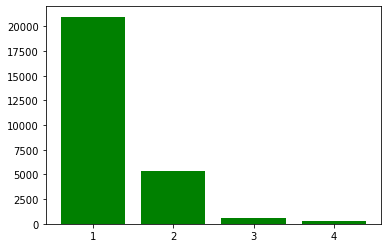

In [56]:
plt.bar(['1','2','3','4'],[min_error_count,error2_count,error3_count,max_error_count],color ='green')

In [57]:
joblib.dump(model,"Ratings_Pred.pkl")

['Ratings_Pred.pkl']